# Final CHO Model
This notebook is to asses the validity of our reconstruction and how complete it is.

[1. Generation of the dataset and model reconstruction](#generation) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.1 Retrieve information from the Google Sheet datasets reactions and metabolites**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.2 Build a model and feed it the information from the df generated** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.3 Save and validate the model** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.4 Check for unbalanced reactions** <br>

[2. Identification of Blocked Reactions and Dead-End Metabolites](#blocked&deadends) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.1 Identification of Blocked Reactions**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.2 Identification of Dead-Ends Metabolites** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.3 Addition of Extracellular Exchange Reanctions** <br>

[3. Generation of the Mass Flow Graph](#MFG) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.1 Generation of the "D-Matrix"**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.3 Generation of the "FluxOpenValue" matrix** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.4 Generation of the "Mass Flow Graph (MFG) Matrix"** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.5 Plotting the "MFG Matrix"** <br>

[4. Identification of duplicates through Chemical Formulas](#formulas) <br>

## 1. Generation of the dataset and model reconstruction <a id='generation'></a>
Here we generate the CHO model from the dataset stored in the Google Sheet file. We first use the google_sheet module to extract all the necessary information from the original dataset. Then we use those dataset and the COBRApy library to: (1) Create a new model and add reactions from the **Rxns Sheet**, (2) Add information on each reaction obtained from the **Rxns Sheet** and **Attributes Sheet**, (3) Add boundary reactions from the **BoundaryRxns Sheet**, and (4) Add information for each metabolite from the **Metabolites Sheet**. Finally we save the model as a SBML file and validate it using the cobrapy built-in function "validate_sbml_model( )".

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime

import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import validate_sbml_model, save_json_model, write_sbml_model

from tqdm.notebook import tqdm

from google_sheet import GoogleSheet

### 1.1 Retrieve information from the Google Sheet datasets reactions and metabolites

In [2]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from the Google Sheet
sheet_met = 'Metabolites'
sheet_rxns = 'Rxns'
sheet_attributes = 'Attributes'
sheet_boundary = 'BoundaryRxns'

metabolites = sheet.read_google_sheet(sheet_met)
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_attributes = sheet.read_google_sheet(sheet_attributes)
boundary_rxns = sheet.read_google_sheet(sheet_boundary)

### 1.2 Build a model and feed it the information from the df generated

In [3]:
##### ----- Create a model and add reactions ----- #####
model = Model("iCHO")
lr = []
for _, row in rxns.iterrows():
    r = Reaction(row['Reaction'])
    lr.append(r)    
model.add_reactions(lr)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


In [4]:
##### ----- Add information to each one of the reactions ----- #####
for i,r in enumerate(tqdm(model.reactions)):    
    r.build_reaction_from_string(rxns['Reaction Formula'][i])
    r.name = rxns['Reaction Name'][i]
    r.subsystem = rxns['Subsystem'][i]
    r.gene_reaction_rule = str(rxns['GPR_final'][i])
    r.lower_bound = float(rxns_attributes['Lower bound'][i])
    r.upper_bound = float(rxns_attributes['Upper bound'][i])
    
model

  0%|          | 0/10514 [00:00<?, ?it/s]

unknown metabolite '13dampp_c' created
unknown metabolite 'h2o_c' created
unknown metabolite 'o2_c' created
unknown metabolite 'bamppald_c' created
unknown metabolite 'h2o2_c' created
unknown metabolite 'nh4_c' created
unknown metabolite '2amac_c' created
unknown metabolite 'pyr_c' created
unknown metabolite 'nadph_c' created
unknown metabolite 'paps_c' created
unknown metabolite 'Lcyst_c' created
unknown metabolite 'nadp_c' created
unknown metabolite 'pap_c' created
unknown metabolite '3sala_c' created
unknown metabolite 'akg_c' created
unknown metabolite 'h_c' created
unknown metabolite '3snpyr_c' created
unknown metabolite 'glu_L_c' created
unknown metabolite '3sala_m' created
unknown metabolite 'akg_m' created
unknown metabolite 'h_m' created
unknown metabolite '3snpyr_m' created
unknown metabolite 'glu_L_m' created
unknown metabolite 'so3_c' created
unknown metabolite 'h2o_m' created
unknown metabolite 'pyr_m' created
unknown metabolite 'so3_m' created
unknown metabolite '4hglusa_

Malformed gene_reaction_rule '(__cobra_escape__100766805 and __cobra_escape__3979182 and __cobra_escape__100768142 and __cobra_escape__100774773 and __cobra_escape__100750822 and __cobra_escape__100766032 and __cobra_escape__100759002 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 and __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__100765757 and __cobra_escape__100762701) or (__cobra_escape__100766805 and __cobra_escape__100774773 and __cobra_escape__100768142 and __cobra_escape__3979182 and __cobra_escape__100750822 and __cobra_escape__100759002 and __cobra_escape__100766032 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__

GPR will be empty


unknown metabolite 'thr_L_m' created
unknown metabolite 'thr_L_c' created
unknown metabolite 'acald_c' created
unknown metabolite '2mb2coa_m' created
unknown metabolite 'tiggly_m' created
unknown metabolite 'HC02119_c' created
unknown metabolite 'h2o2_m' created
unknown metabolite 'so4_m' created
unknown metabolite 'hpyr_c' created
unknown metabolite 'glcn_c' created
unknown metabolite '5dglcn_c' created
unknown metabolite 'abt_c' created
unknown metabolite 'xylu_L_c' created
unknown metabolite 'acglu_m' created
unknown metabolite 'cit_c' created
unknown metabolite 'acnam_c' created
unknown metabolite 'HC01115_c' created
unknown metabolite 'acorn_c' created
unknown metabolite 'icit_c' created
unknown metabolite 'acon_C_c' created
unknown metabolite 'cit_m' created
unknown metabolite 'acon_C_m' created
unknown metabolite 'icit_m' created
unknown metabolite 'ac_m' created
unknown metabolite 'amp_m' created
unknown metabolite 'ppi_m' created
unknown metabolite '13dpg_c' created
unknown me

/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100755207 and __cobra_escape__100767351 and __cobra_escape__100768321 and __cobra_escape__100770670 and __cobra_escape__100762701 and __cobra_escape__100759281 and __cobra_escape__103158861 and __cobra_escape__3979185 and h1349 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__3979186 and __cobra_escape__100765757 and __cobra_escape__113837268 and __cobra_escape__3979189 and h170712 and __cobra_escape__113837643 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100757022 and __cobra_escape__100764001'
  warn(


unknown metabolite 'h2o2_e' created
unknown metabolite 'nh4_e' created
unknown metabolite 'sprm_x' created
unknown metabolite 'CE1935_x' created
unknown metabolite 'CE1940_c' created
unknown metabolite 'spmd_e' created
unknown metabolite 'CE1940_e' created
unknown metabolite 'CE1940_x' created
unknown metabolite 'CE1943_c' created
unknown metabolite 'CE1943_e' created
unknown metabolite 'CE1943_x' created
unknown metabolite 'CE1936_c' created
unknown metabolite 'CE1936_e' created
unknown metabolite 'CE1936_x' created
unknown metabolite 'CE1939_c' created
unknown metabolite 'CE1939_e' created
unknown metabolite 'CE1939_x' created
unknown metabolite 'n8aspmd_c' created
unknown metabolite 'CE1059_c' created
unknown metabolite 'N1sprm_x' created
unknown metabolite '3aap_x' created
unknown metabolite 'ptrc_x' created
unknown metabolite 'C03413_x' created
unknown metabolite 'dhspmd_c' created
unknown metabolite 'lys_L_c' created
unknown metabolite 'dohps_c' created
unknown metabolite 'CE1556

unknown metabolite 'lnlncg_l' created
unknown metabolite 'M01490_l' created
unknown metabolite 'dlnlcg_l' created
unknown metabolite 'M01476_l' created
unknown metabolite 'adrn_l' created
unknown metabolite 'M01483_l' created
unknown metabolite 'tettet6_l' created
unknown metabolite 'M01472_l' created
unknown metabolite 'tetpent6_l' created
unknown metabolite 'M01467_l' created
unknown metabolite 'dcsptn1_l' created
unknown metabolite 'M01456_l' created
unknown metabolite 'M00008_l' created
unknown metabolite 'M01461_l' created
unknown metabolite 'M00021_l' created
unknown metabolite 'M01453_l' created
unknown metabolite 'M00265_l' created
unknown metabolite 'ddcacoa_r' created
unknown metabolite 'M01498_r' created
unknown metabolite 'tridcoa_r' created
unknown metabolite 'M01510_r' created
unknown metabolite 'tdcoa_r' created
unknown metabolite 'M01501_r' created
unknown metabolite 'M00129_r' created
unknown metabolite 'M01487_r' created
unknown metabolite 'CE0784_r' created
unknown m

unknown metabolite 's2l2n2m2m_l' created
unknown metabolite 's2l2n2m2mn_l' created
unknown metabolite 'g1m8masn_g' created
unknown metabolite 'h2o_g' created
unknown metabolite 'glc1man_g' created
unknown metabolite 'm7masnA_g' created
unknown metabolite 'g2m8masn_g' created
unknown metabolite 'glc2man_g' created
unknown metabolite 'g3m8masn_g' created
unknown metabolite 'glc3man_g' created
unknown metabolite 'g1m7masnC_g' created
unknown metabolite 'm6masnC_g' created
unknown metabolite 'g1m7masnB_g' created
unknown metabolite 'm6masnB2_g' created
unknown metabolite 'g1m6masnB1_g' created
unknown metabolite 'm5masnB1_g' created
unknown metabolite 'gdpfuc_g' created
unknown metabolite 'nm4masn_g' created
unknown metabolite 'fnm4masn_g' created
unknown metabolite 'gdp_g' created
unknown metabolite 'nm2masn_g' created
unknown metabolite 'fnm2masn_g' created
unknown metabolite 'n3m2masn_g' created
unknown metabolite 'fn3m2masn_g' created
unknown metabolite 'n4m2masn_g' created
unknown met

unknown metabolite 'Tn_antigen_l' created
unknown metabolite 'Ser_Gly_Ala_X_Gly_l' created
unknown metabolite 'udpacgal_l' created
unknown metabolite 'M00206_c' created
unknown metabolite 'M00218_c' created
unknown metabolite 'M00217_c' created
unknown metabolite 'M00197_c' created
unknown metabolite 'M00199_c' created
unknown metabolite 'M00215_c' created
unknown metabolite 'adprib_c' created
unknown metabolite 'M02496_c' created
unknown metabolite 'ha_l' created
unknown metabolite 'glcur_l' created
unknown metabolite 'ha_e' created
unknown metabolite 'acgam_e' created
unknown metabolite 'glcur_e' created
unknown metabolite 'nxylrbtlprbtlpgalnmser_g' created
unknown metabolite 'udpxyl_g' created
unknown metabolite 'adystroglycan_g' created
unknown metabolite 'l5fn5m2masn_g' created
unknown metabolite 'l6fn6m2masn_g' created
unknown metabolite 'mser_g' created
unknown metabolite 'ksi_deg7_l' created
unknown metabolite 'ksi_deg10_l' created
unknown metabolite 'ksi_deg13_l' created
unkno

unknown metabolite 'nrpphrsf_c' created
unknown metabolite 'peamn_c' created
unknown metabolite 'pheacgln_c' created
unknown metabolite 'phaccoa_m' created
unknown metabolite 'pheacgly_m' created
unknown metabolite 'phe_L_m' created
unknown metabolite 'phpyr_m' created
unknown metabolite 'thbpt4acam_c' created
unknown metabolite '2hyoxplac_c' created
unknown metabolite 'quln_c' created
unknown metabolite 'C10164_c' created
unknown metabolite 'CE2870_c' created
unknown metabolite 'CE2870_g' created
unknown metabolite 'CE2866_g' created
unknown metabolite 'so4_g' created
unknown metabolite 'CE2870_r' created
unknown metabolite 'so4_r' created
unknown metabolite 'CE2873_g' created
unknown metabolite 'CE2872_g' created
unknown metabolite 'CE2873_r' created
unknown metabolite 'CE2875_g' created
unknown metabolite 'CE2874_g' created
unknown metabolite 'CE2875_r' created
unknown metabolite 'CE2876_c' created
unknown metabolite 'CE2876_r' created
unknown metabolite 'CE2877_c' created
unknown m

unknown metabolite 'dchac_c' created
unknown metabolite 'dchac_e' created
unknown metabolite 'C05299_c' created
unknown metabolite 'C05299_e' created
unknown metabolite 'C05301_c' created
unknown metabolite 'C05301_e' created
unknown metabolite 'C05302_c' created
unknown metabolite 'C05302_e' created
unknown metabolite 'tdechola_c' created
unknown metabolite 'tdechola_e' created
unknown metabolite 'C05769_e' created
unknown metabolite 'C05770_c' created
unknown metabolite 'C05770_e' created
unknown metabolite 'C09642_e' created
unknown metabolite 'c226coa_c' created
unknown metabolite 'c226coa_x' created
unknown metabolite 'c4crn_x' created
unknown metabolite 'c4crn_c' created
unknown metabolite 'btcoa_x' created
unknown metabolite 'crn_x' created
unknown metabolite 'hxcoa_x' created
unknown metabolite 'c6crn_x' created
unknown metabolite 'c6crn_c' created
unknown metabolite 'ca24g_c' created
unknown metabolite 'ca24g_e' created
unknown metabolite 'ca2_e' created
unknown metabolite 'ca

unknown metabolite 'estradiolglc_r' created
unknown metabolite 'estradiol_e' created
unknown metabolite 'estradiol_c' created
unknown metabolite 'estradiol_r' created
unknown metabolite 'estriolglc_c' created
unknown metabolite 'estriolglc_e' created
unknown metabolite 'estriolglc_r' created
unknown metabolite 'estriol_r' created
unknown metabolite 'estriol_c' created
unknown metabolite 'estroneglc_c' created
unknown metabolite 'estroneglc_e' created
unknown metabolite 'estroneglc_r' created
unknown metabolite 'estrones_e' created
unknown metabolite 'estrones_c' created
unknown metabolite 'estrone_r' created
unknown metabolite 'estrone_c' created
unknown metabolite 'etoh_e' created
unknown metabolite 'fadh2_x' created
unknown metabolite 'fad_x' created
unknown metabolite 'fald_l' created
unknown metabolite 'hdca_c' created
unknown metabolite 'hdca_e' created
unknown metabolite 'ocdcea_c' created
unknown metabolite 'ocdcea_e' created
unknown metabolite 'ocdca_c' created
unknown metaboli

unknown metabolite 'lnlncgcoa_r' created
unknown metabolite 'dlnlcgcrn_r' created
unknown metabolite 'dcsptn1crn_r' created
unknown metabolite 'M01770_r' created
unknown metabolite 'M00022_r' created
unknown metabolite 'M00263_r' created
unknown metabolite 'M03046_c' created
unknown metabolite 'M03047_c' created
unknown metabolite 'M03046_r' created
unknown metabolite 'lgnccrn_r' created
unknown metabolite 'lgnccrn_c' created
unknown metabolite 'nrvnccrn_c' created
unknown metabolite 'nrvnccrn_r' created
unknown metabolite 'hexccrn_r' created
unknown metabolite 'hexccrn_c' created
unknown metabolite 'M02111_c' created
unknown metabolite 'M02112_c' created
unknown metabolite 'M02111_r' created
unknown metabolite 'tetpent3crn_c' created
unknown metabolite 'tetpent3crn_r' created
unknown metabolite 'tettet6crn_c' created
unknown metabolite 'tettet6crn_r' created
unknown metabolite 'tetpent6crn_c' created
unknown metabolite 'tetpent6crn_r' created
unknown metabolite 'tethex3coa_c' created


unknown metabolite 'prophe_e' created
unknown metabolite 'prophe_c' created
unknown metabolite 'proproarg_e' created
unknown metabolite 'proproarg_c' created
unknown metabolite 'propropro_e' created
unknown metabolite 'propropro_c' created
unknown metabolite 'prostga1_e' created
unknown metabolite 'prostga1_c' created
unknown metabolite 'prostgc1_e' created
unknown metabolite 'prostgc1_c' created
unknown metabolite 'prostgd2_e' created
unknown metabolite 'prostgd2_c' created
unknown metabolite 'prostge1_e' created
unknown metabolite 'prostge1_c' created
unknown metabolite 'prostge2_e' created
unknown metabolite 'prostge2_c' created
unknown metabolite 'prostgf2_e' created
unknown metabolite 'prostgf2_c' created
unknown metabolite 'prostgh2_e' created
unknown metabolite 'prostgh2_c' created
unknown metabolite 'prostgi2_e' created
unknown metabolite 'prostgi2_c' created
unknown metabolite 'prostgi2_r' created
unknown metabolite 'protrplys_e' created
unknown metabolite 'protrplys_c' create

unknown metabolite 'HC02197_e' created
unknown metabolite 'HC02197_c' created
unknown metabolite 'HC02187_e' created
unknown metabolite 'wharachd_e' created
unknown metabolite 'HC02202_e' created
unknown metabolite 'HC02202_c' created
unknown metabolite 'HC02206_e' created
unknown metabolite 'HC02206_c' created
unknown metabolite 'HC02208_e' created
unknown metabolite 'HC02208_c' created
unknown metabolite 'HC02210_e' created
unknown metabolite 'HC02210_c' created
unknown metabolite 'HC02214_e' created
unknown metabolite 'HC02214_c' created
unknown metabolite 'HC02216_e' created
unknown metabolite 'HC02216_c' created
unknown metabolite 'HC02217_e' created
unknown metabolite 'HC02217_c' created
unknown metabolite 'HC00342_c' created
unknown metabolite 'HC00342_m' created
unknown metabolite 'c8crn_m' created
unknown metabolite 'pmtcrn_m' created
unknown metabolite 'pcrn_m' created
unknown metabolite 'c4crn_m' created
unknown metabolite 'arachd_x' created
unknown metabolite 'hdca_x' creat

unknown metabolite 'egme_r' created
unknown metabolite 'CN0016diol_c' created
unknown metabolite 'CN0016diolepox_c' created
unknown metabolite 'CN0016diol_r' created
unknown metabolite 'CN0016diolepox_r' created
unknown metabolite 'CN0016epox_c' created
unknown metabolite 'CN0016epox_r' created
unknown metabolite 'CN0016epox_x' created
unknown metabolite 'CN0016diol_x' created
unknown metabolite 'CN0016_c' created
unknown metabolite 'CN0016_r' created
unknown metabolite 'dhnpthld_c' created
unknown metabolite 'npthld_c' created
unknown metabolite 'CN0022_c' created
unknown metabolite 'CN0023_c' created
unknown metabolite 'CN0022_r' created
unknown metabolite 'CN0023_r' created
unknown metabolite 'CN0020_c' created
unknown metabolite 'CN0021_c' created
unknown metabolite 'CN0020_r' created
unknown metabolite 'CN0021_r' created
unknown metabolite 'ecgon_r' created
unknown metabolite 'pecgon_r' created
unknown metabolite '5dhf_m' created
unknown metabolite 'Nforglu_c' created
unknown meta

unknown metabolite '3oc183_9Z_12Z_15Zcoa_x' created
unknown metabolite '3oecstcoa_m' created
unknown metabolite '3oecstcoa_x' created
unknown metabolite '3oc204_5Z_8Z_11Z_14Zcoa_m' created
unknown metabolite '3oc204_5Z_8Z_11Z_14Zcoa_x' created
unknown metabolite '3oc205_5Z_8Z_11Z_14Z_17Zcoa_m' created
unknown metabolite '3oc205_5Z_8Z_11Z_14Z_17Zcoa_x' created
unknown metabolite 'CE5156_m' created
unknown metabolite 'CE4819_m' created
unknown metabolite 'CE4819_x' created
unknown metabolite 'CE4833_m' created
unknown metabolite 'CE4833_x' created
unknown metabolite '3odttcsecoa_x' created
unknown metabolite 'CE4834_m' created
unknown metabolite 'CE4834_x' created
unknown metabolite 'CE4820_m' created
unknown metabolite 'CE4826_x' created
unknown metabolite '3opentcoa_m' created
unknown metabolite '3ohpcoa_m' created
unknown metabolite '3oc81_5Zcoa_m' created
unknown metabolite '3oc81_5Zcoa_x' created
unknown metabolite '3onncoa_m' created
unknown metabolite '3ktdmhptcoa_m' created
unkno

unknown metabolite 'lneldcACP_c' created
unknown metabolite 'ptdcacoa_c' created
unknown metabolite 'hpdcacoa_c' created
unknown metabolite 'vacc_x' created
unknown metabolite 'octd11ecoa_x' created
unknown metabolite 'lneldc_x' created
unknown metabolite 'lneldccoa_x' created
unknown metabolite 'eicostet_x' created
unknown metabolite 'tmndnc_x' created
unknown metabolite 'docoscoa_x' created
unknown metabolite 'dcsptn1_x' created
unknown metabolite 'clpnd_x' created
unknown metabolite 'crvnc_x' created
unknown metabolite 'tettet6_x' created
unknown metabolite 'tetpent6_x' created
unknown metabolite 'tetpent3_x' created
unknown metabolite 'tethex3_x' created
unknown metabolite 'hexc_x' created
unknown metabolite 'malcoa_r' created
unknown metabolite '3oicscoa_r' created
unknown metabolite 'CE5144_r' created
unknown metabolite '3oeicostricoa_r' created
unknown metabolite 'CE4793_r' created
unknown metabolite '3oecstcoa_r' created
unknown metabolite 'CE2250_r' created
unknown metabolite 

unknown metabolite 'CE7081_c' created
unknown metabolite 'CE7109_c' created
unknown metabolite 'CE7081_x' created
unknown metabolite 'CE7109_x' created
unknown metabolite 'CE7088_c' created
unknown metabolite 'tmndnc_n' created
unknown metabolite 'CE7088_n' created
unknown metabolite 'ocdca_r' created
unknown metabolite 'M00049_x' created
unknown metabolite 'M00783_x' created
unknown metabolite 'CE2245_x' created
unknown metabolite 'CE2249_x' created
unknown metabolite 'CE2253_x' created
unknown metabolite 'CE2242_x' created
unknown metabolite 'CE2246_x' created
unknown metabolite 'CE2250_x' created
unknown metabolite 'CE2243_x' created
unknown metabolite 'CE2247_x' created
unknown metabolite 'CE2251_x' created
unknown metabolite 'CE2248_x' created
unknown metabolite 'oc2coa_x' created
unknown metabolite '3hocoa_x' created
unknown metabolite '3oocoa_x' created
unknown metabolite '3hhcoa_x' created
unknown metabolite '3ohcoa_x' created
unknown metabolite 'b2coa_x' created
unknown metabo

unknown metabolite 'CE5308_m' created
unknown metabolite 'CE5310_m' created
unknown metabolite 'CE5311_m' created
unknown metabolite 'CE5312_m' created
unknown metabolite 'CE5305_m' created
unknown metabolite 'CE5321_m' created
unknown metabolite 'CE5325_m' created
unknown metabolite 'CE5323_m' created
unknown metabolite 'CE5319_m' created
unknown metabolite 'CE5328_m' created
unknown metabolite 'CE5326_m' created
unknown metabolite 'CE5327_m' created
unknown metabolite 'CE5318_m' created
unknown metabolite 'CE5320_m' created
unknown metabolite 'CE5322_m' created
unknown metabolite 'CE5324_m' created
unknown metabolite 'CE5317_m' created
unknown metabolite 'CE7097_c' created
unknown metabolite 'CE5178_c' created
unknown metabolite 'leuktrB4_m' created
unknown metabolite 'CE7097_m' created
unknown metabolite 'leuktrB4_x' created
unknown metabolite 'CE7097_x' created
unknown metabolite 'CE5815_c' created
unknown metabolite 'C04805_r' created
unknown metabolite 'CE5815_r' created
unknown 

unknown metabolite 'f1p_c' created
unknown metabolite 'glyald_c' created
unknown metabolite 'f26bp_c' created
unknown metabolite 'cs_cho_linkage_g' created
unknown metabolite 'cs_pre_g' created
unknown metabolite 'cs_a_b_pre2_g' created
unknown metabolite 'cs_a_b_pre3_g' created
unknown metabolite 'cs_c_pre2_g' created
unknown metabolite 'cs_c_pre3_g' created
unknown metabolite 'cs_d_pre3_g' created
unknown metabolite 'cs_d_pre4_g' created
unknown metabolite 'cs_e_pre3_g' created
unknown metabolite 'cs_e_pre4_g' created
unknown metabolite 'lxser_g' created
unknown metabolite 'l2xser_g' created
unknown metabolite 'glygn5_e' created
unknown metabolite 'Tyr_ggn_e' created
unknown metabolite 'g16bp_c' created
unknown metabolite 'gdpddman_c' created
unknown metabolite 'Tyr_ggn_c' created
unknown metabolite 'ggn_c' created
unknown metabolite 'glygn1_c' created
unknown metabolite 'hs_deg9_l' created
unknown metabolite 'hs_deg10_l' created
unknown metabolite 'cs_a_deg2_l' created
unknown metab

unknown metabolite '17ahprgnlone_r' created
unknown metabolite '17ahprgstrn_r' created
unknown metabolite 'acleuktrE4_c' created
unknown metabolite 'pgh3_c' created
unknown metabolite '17ahprgstrn_m' created
unknown metabolite 'andrstndn_m' created
unknown metabolite 'CE1352_g' created
unknown metabolite '17ahprgnlone_g' created
unknown metabolite 'CE1352_l' created
unknown metabolite '17ahprgnlone_l' created
unknown metabolite 'CE1352_r' created
unknown metabolite 'chsterols_g' created
unknown metabolite 'chsterols_l' created
unknown metabolite '17ahprgnlone_m' created
unknown metabolite 'dhea_m' created
unknown metabolite 'prgnlones_g' created
unknown metabolite 'prgnlone_g' created
unknown metabolite 'prgnlones_l' created
unknown metabolite 'prgnlone_l' created
unknown metabolite 'CE2183_c' created
unknown metabolite 'CE2186_c' created
unknown metabolite 'CE2189_c' created
unknown metabolite 'C05299_r' created
unknown metabolite 'CE2184_c' created
unknown metabolite 'CE5250_c' creat

Malformed gene_reaction_rule '__cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552' for 100756663 100756951 100766960 or 100773287 or 100750552
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552
                              ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/

unknown metabolite 'mag_cho_m' created
unknown metabolite 'galthcrm_cho_g' created
unknown metabolite 'galgalthcrm_cho_g' created
unknown metabolite 'gm2_cho_l' created
unknown metabolite 'ga1_cho_l' created
unknown metabolite 'ga2_cho_l' created
unknown metabolite 'memgacpail_cho_r' created
unknown metabolite 'm2emgacpail_cho_r' created
unknown metabolite 'dlclpn_cho_c' created
unknown metabolite 'mlclpn_cho_c' created
unknown metabolite 'thcrm_cho_l' created
unknown metabolite 'g3pi_c' created
unknown metabolite 'mgacpail_cho_r' created
unknown metabolite 'm2gacpail_cho_r' created
unknown metabolite 'm3gacpail_cho_r' created
unknown metabolite 'emgacpail_cho_r' created
unknown metabolite 'm3emgacpail_cho_r' created
unknown metabolite 'em2emgacpail_cho_r' created
unknown metabolite 'mem2emgacpail_cho_r' created
unknown metabolite 'gpi_cho_r' created
unknown metabolite 'm_em_3gacpail_r' created
unknown metabolite 'gm3_cho_l' created
unknown metabolite 'paps_l' created
unknown metabolit

/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552'
  warn(


unknown metabolite 'trnacys_m' created
unknown metabolite 'dnac_n' created
unknown metabolite 'dhpmp_c' created
unknown metabolite 'ficytb5_c' created
unknown metabolite 'focytb5_c' created
unknown metabolite 'ficytb5_m' created
unknown metabolite 'focytb5_m' created
unknown metabolite '2dsis_c' created
unknown metabolite '3a23dsi_c' created
unknown metabolite 'glntrna_m' created
unknown metabolite 'trnagln_m' created
unknown metabolite 'glutrna_m' created
unknown metabolite 'trnaglu_m' created
unknown metabolite 'srb_L_c' created
unknown metabolite 'h2co3_c' created
unknown metabolite 'h2co3_m' created
unknown metabolite 'hexdp_c' created
unknown metabolite 'hepdp_c' created
unknown metabolite 'histrna_m' created
unknown metabolite 'trnahis_m' created
unknown metabolite '3h3mglt_m' created
unknown metabolite 'M02828_m' created
unknown metabolite 'M02665_m' created
unknown metabolite 'egme_c' created
unknown metabolite 'M01678_c' created
unknown metabolite 'M01677_c' created
unknown me

unknown metabolite 'pacald_m' created
unknown metabolite 'pac_m' created
unknown metabolite 'HC01522_c' created
unknown metabolite 'HC00460_c' created
unknown metabolite 'HC01104_e' created
unknown metabolite 'HC00832_c' created
unknown metabolite 'HC00664_c' created
unknown metabolite 'HC01180_c' created
unknown metabolite 'HC01444_e' created
unknown metabolite 'cyala_e' created
unknown metabolite 'glucyala_e' created
unknown metabolite 'HC01700_e' created
unknown metabolite 'HC01361_e' created
unknown metabolite 'HC01446_e' created
unknown metabolite 'HC01440_e' created
unknown metabolite '34dhmald_m' created
unknown metabolite '34dhoxmand_m' created
unknown metabolite '3mox4hpac_m' created
unknown metabolite 'homoval_m' created
unknown metabolite '3m4hpga_m' created
unknown metabolite '3mox4hoxm_m' created
unknown metabolite 'HC01609_e' created
unknown metabolite 'cpppg1_e' created
unknown metabolite 'HC01223_m' created
unknown metabolite '3hmp_m' created
unknown metabolite 'HC01797

unknown metabolite 'M01080_m' created
unknown metabolite 'M01079_m' created
unknown metabolite 'M00746_m' created
unknown metabolite 'M00753_m' created
unknown metabolite 'M02977_m' created
unknown metabolite 'M00742_m' created
unknown metabolite 'M02977_c' created
unknown metabolite 'M00615_c' created
unknown metabolite 'M00742_c' created
unknown metabolite 'M00743_c' created
unknown metabolite 'M00615_x' created
unknown metabolite 'M00743_x' created
unknown metabolite 'M00979_c' created
unknown metabolite 'M00977_c' created
unknown metabolite 'M01082_c' created
unknown metabolite 'M01084_c' created
unknown metabolite '20ahchsterol_r' created
unknown metabolite 'xoltri27_m' created
unknown metabolite 'CE3038_m' created
unknown metabolite 'CE4872_m' created
unknown metabolite 'CE4874_m' created
unknown metabolite 'dhocholoylcoa_x' created
unknown metabolite 'lca24g_r' created
unknown metabolite 'lca3g_r' created
unknown metabolite 'xoltetrol_m' created
unknown metabolite 'thcholst_m' c

Malformed gene_reaction_rule '__cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960' for 100750552 and 100756663 100756951 100766960
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho2.0/lib/python3.10/site-packages/cobra/cor

unknown metabolite 'gm2_cho_e' created
unknown metabolite 'acgal_e' created
unknown metabolite 'gm3_cho_e' created
unknown metabolite 'M02748_c' created
unknown metabolite 'phsphings_c' created
unknown metabolite 'HC02048_g' created
unknown metabolite 'galgluside_cho_r' created
unknown metabolite 'sphings_e' created
unknown metabolite 'HC02065_l' created
unknown metabolite '1glyc_cho_e' created
unknown metabolite 'm_em_3gacpail_cho_r' created
unknown metabolite 'm_em_3gacpail_prot_cho_r' created
unknown metabolite 'mem2emgacpail_prot_cho_r' created
unknown metabolite 'acnam_e' created
unknown metabolite 'gd1a_cho_e' created
unknown metabolite 'gd1b_cho_e' created
unknown metabolite 'gt1b_cho_e' created
unknown metabolite 'gd3_cho_e' created
unknown metabolite 'gd2_cho_e' created
unknown metabolite 'gd1a_cho_n' created
unknown metabolite 'gm1_cho_n' created
unknown metabolite 'gm1b_cho_e' created
unknown metabolite 'ga1_cho_e' created
unknown metabolite 'pail35p_cho_c' created
unknown m

unknown metabolite 'HC00006_c' created
unknown metabolite 'HC00007_c' created
unknown metabolite 'HC00008_c' created
unknown metabolite 'HC01852_c' created
unknown metabolite 'HC01942_c' created
unknown metabolite 'HC01943_c' created
unknown metabolite 'HC01944_c' created
unknown metabolite 'HC00009_c' created
unknown metabolite 'HC00006_e' created
unknown metabolite 'HC00007_e' created
unknown metabolite 'HC00008_e' created
unknown metabolite 'HC00009_e' created


Name,iCHO
Memory address,15187d9f0
Number of metabolites,7755
Number of reactions,10514
Number of genes,3124
Number of groups,0
Objective expression,0
Compartments,


In [5]:
##### ----- Add Boundary Reactions ----- #####
dr = []
for _, row in boundary_rxns.iterrows():
    r = Reaction(row['Reaction'])
    dr.append(r)    
model.add_reactions(dr)

boundary_rxns_dict = boundary_rxns.set_index('Reaction').to_dict()
boundary_rxns_dict

for i,r in enumerate(tqdm(model.reactions)):
    if r in dr:
        r.build_reaction_from_string(boundary_rxns_dict['Reaction Formula'][r.id])
        r.name = boundary_rxns_dict['Reaction Name'][r.id]
        r.subsystem = boundary_rxns_dict['Subsystem'][r.id]
        r.lower_bound = float(boundary_rxns_dict['Lower bound'][r.id])
        r.upper_bound = float(boundary_rxns_dict['Upper bound'][r.id]) 
model

  0%|          | 0/11498 [00:00<?, ?it/s]

Name,iCHO
Memory address,15187d9f0
Number of metabolites,7755
Number of reactions,11498
Number of genes,3124
Number of groups,0
Objective expression,0
Compartments,


In [6]:
##### ----- Add information for each metabolite ----- #####
metabolites_dict = metabolites.set_index('BiGG ID').to_dict('dict')
metabolites_dict['Name']
for met in model.metabolites:
    met.name = metabolites_dict['Name'][f'{met}']
    met.formula = metabolites_dict['Formula'][f'{met}']
    met.compartment = metabolites_dict['Compartment'][f'{met}'].split(' - ')[0]
    try:
        met.charge = int(metabolites_dict['Charge'][f'{met}'])
    except (ValueError, TypeError):
        print(f'{met} doesnt have charge')

mtpp_c doesnt have charge
Npmehis_c doesnt have charge
frmd_c doesnt have charge
hdxur_c doesnt have charge
dna5mtc_c doesnt have charge
5dglcn_c doesnt have charge
dna_prod_n doesnt have charge
gdpglc_c doesnt have charge
M01388_c doesnt have charge
M03165_c doesnt have charge
M03166_c doesnt have charge
alatrna_c doesnt have charge
argtrna_c doesnt have charge
asntrna_c doesnt have charge
asptrna_c doesnt have charge
cystrna_c doesnt have charge
glntrna_c doesnt have charge
glutrna_c doesnt have charge
glytrna_c doesnt have charge
histrna_c doesnt have charge
iletrna_c doesnt have charge
leutrna_c doesnt have charge
lystrna_c doesnt have charge
mettrna_c doesnt have charge
phetrna_c doesnt have charge
protrna_c doesnt have charge
sertrna_c doesnt have charge
thrtrna_c doesnt have charge
trptrna_c doesnt have charge
tyrtrna_c doesnt have charge
valtrna_c doesnt have charge
prot_c doesnt have charge
trnaala_c doesnt have charge
trnaarg_c doesnt have charge
trnaasn_c doesnt have charge


### 1.3 Save and validate the model

In [7]:
##### ----- Build the S matrix ----- #####
S = cobra.util.create_stoichiometric_matrix(model, array_type='dense')
model.S = S

model.objective = 'biomass_cho'
model.optimize()

,fluxes,reduced_costs
13DAMPPOX,0.0,0.0
2AMACHYD,1000.0,0.0
2AMACSULT,0.0,0.0
3SALATAi,0.0,0.0
3SALATAim,0.0,0.0
...,...,...
EX_c8dc,0.0,0.0
EX_docosac,-750.0,0.0
EX_ivcrn,0.0,0.0
EX_tdcrn,0.0,0.0


In [8]:
##### ----- Save the model ----- #####
model_name_xml = 'iCHOv3_CHO_'+datetime.now().strftime("%d%m%Y")+'.xml' 
write_sbml_model(model, model_name_xml)

# Write in json because, the sbml doesnt savve the subsystems
model_name_json = 'iCHOv3_CHO_'+datetime.now().strftime("%d%m%Y")+'.json' 
save_json_model(model, model_name_json)

In [9]:
##### ----- Test for errors in the recostruction ----- ######

# import tempfile
# from pprint import pprint
# from cobra.io import write_sbml_model, validate_sbml_model
# with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
#     write_sbml_model(model, filename=f_sbml.name)
#     report = validate_sbml_model(filename=f_sbml.name)
# pprint(report)

from cobra.io import read_sbml_model, validate_sbml_model
(_, errors) = validate_sbml_model(model_name_xml)
errors

{'SBML_FATAL': [],
 'SBML_ERROR': [],
 'SBML_SCHEMA_ERROR': [],
 'SBML_WARNING': [],
 'COBRA_FATAL': [],
 'COBRA_ERROR': [],
 'COBRA_WARNING': [],
 'COBRA_CHECK': []}

### 1.4 Check for unbalanced reactions
Once the model is checked and saved as a xml and json format we then evaluate the amount of mass and charge unbalanced reactions

In [10]:
# Check for unbalanced reactions


# Lists to store the data for each column
reaction_ids = []
formulas = []
metabolites = []
unbalances = []

counter = 0
for rxn in model.reactions:
    if not rxn.id.startswith(('EX_','DM_','SK_')):
        mb = rxn.check_mass_balance()
        if mb != {}:# and set(mb.keys()) != {'charge'}:  # Check if dictionary has keys other than 'charge'
            counter+=1
            prod_ids = [{met.id:met.formula} for met in rxn.products]
            react_ids = [{met.id:met.formula} for met in rxn.reactants]
            # Append values to lists
            print(rxn.id)
            reaction_ids.append(rxn.id)
            print(rxn.reaction)
            formulas.append(rxn.reaction)
            print(react_ids + prod_ids)
            metabolites.append(react_ids + prod_ids)
            print(mb)
            unbalances.append(mb)
            print('...............................')
print(counter)

# Create DataFrame from lists
mass_unbalanced_reactions = pd.DataFrame({
    "Reaction ID": reaction_ids,
    "Formula": formulas,
    "Metabolites": metabolites,
    "Unbalance": unbalances
})

mass_unbalanced_reactions.to_excel("mass_unbalanced_reactions.xlsx", engine='openpyxl', index=False)

GAUGE-R04283
4izp_c + 2.0 h2o_c <=> 4ogm_c + for_c + nh4_c
[{'4izp_c': 'C6H7N2O3'}, {'h2o_c': 'H2O'}, {'4ogm_c': 'C5H6NO4'}, {'for_c': 'CH1O2'}, {'nh4_c': 'H4N'}]
{'O': 1.0}
...............................
UNK2
2kmb_c + gln_L_c + 2.0 h_c --> glu_L_c + met_L_c
[{'2kmb_c': 'C5H7O3S'}, {'gln_L_c': 'C5H10N2O3'}, {'h_c': 'H'}, {'glu_L_c': 'C5H8NO4'}, {'met_L_c': 'C5H11NO2S'}]
{'charge': -2.0}
...............................
r0001
ametam_c --> 5mta_c + HC02119_c
[{'ametam_c': 'C14H24N6O3S'}, {'5mta_c': 'C11H15N5O3S'}, {'HC02119_c': 'X'}]
{'charge': -2, 'C': -3, 'H': -9, 'N': -1, 'X': 1}
...............................
r0145
arg_L_c + 2.0 nadph_c + 2.0 o2_c --> citr_L_c + 2.0 h2o_c + 2.0 nadp_c + no_c
[{'arg_L_c': 'C6H15N4O2'}, {'nadph_c': 'C21H26N7O17P3'}, {'o2_c': 'O2'}, {'citr_L_c': 'C6H13N3O3'}, {'h2o_c': 'H2O'}, {'nadp_c': 'C21H25N7O17P3'}, {'no_c': 'NO'}]
{'charge': 1.0}
...............................
5DGLCNR
glcn_c + nadp_c <=> 5dglcn_c + h_c + nadph_c
[{'nadp_c': 'C21H25N7O17P3'}, {'

LEUTRS
atp_c + leu_L_c + trnaleu_c --> amp_c + leutrna_c + ppi_c
[{'trnaleu_c': 'HR'}, {'atp_c': 'C10H12N5O13P3'}, {'leu_L_c': 'C6H13NO2'}, {'leutrna_c': 'C6H13NOR'}, {'amp_c': 'C10H12N5O7P'}, {'ppi_c': 'HO7P2'}]
{'charge': -1}
...............................
LEUTRSm
atp_m + leu_L_m + trnaleu_m --> amp_m + leutrna_m + ppi_m
[{'atp_m': 'C10H12N5O13P3'}, {'leu_L_m': 'C6H13NO2'}, {'trnaleu_m': 'HR'}, {'amp_m': 'C10H12N5O7P'}, {'leutrna_m': 'C6H13NOR'}, {'ppi_m': 'HO7P2'}]
{'charge': -1}
...............................
LYSTRS
atp_c + lys_L_c + trnalys_c --> amp_c + lystrna_c + ppi_c
[{'trnalys_c': 'HR'}, {'atp_c': 'C10H12N5O13P3'}, {'lys_L_c': 'C6H15N2O2'}, {'lystrna_c': 'C6H15N2OR'}, {'amp_c': 'C10H12N5O7P'}, {'ppi_c': 'HO7P2'}]
{'charge': -2}
...............................
METTRS
atp_c + met_L_c + trnamet_c --> amp_c + mettrna_c + ppi_c
[{'trnamet_c': 'HR'}, {'atp_c': 'C10H12N5O13P3'}, {'met_L_c': 'C5H11NO2S'}, {'mettrna_c': 'C5H11NOSR'}, {'amp_c': 'C10H12N5O7P'}, {'ppi_c': 'HO7P2'}]
{'

In [11]:
# Update the "Balance status" column based on whether the reaction is present in "reaction_ids"
rxns_copy = rxns.copy()
rxns_copy['Balance status'] = rxns_copy['Reaction'].apply(lambda x: 'UNBALANCED' if x in reaction_ids else 'BALANCED')
rxns_equals = rxns_copy.equals(rxns)

In [12]:
##############################################
#### ------------------------------------ ####
#### ---- Update Rxns Google Sheets ----- ####
#### ------------------------------------ ####
##############################################
if not rxns_equals:
    sheet.update_google_sheet(sheet_rxns, rxns_copy)
    print("Google Sheet updated.")

Google Sheet updated.


## 2. Identification of Blocked Reactions and Dead-End Metabolites <a id='blocked&deadends'></a>
In this second part of the notebook we use two different functions from the utils module to: (1) Run a flux variability analysis and identify blocked reactions, and (2) identify dead-end metabolites. Finally we add Extracellular Exchange reactions for the dead-end metabolites that are in the extracellular compartment.

In [13]:
import pandas as pd
from cobra.io import read_sbml_model
from cobra.flux_analysis import find_blocked_reactions
from utils import detect_dead_ends

In [ ]:
##### ----- Read Model ----- #####
model = read_sbml_model("iCHOv3_CHO_02082023.xml")

### 2.1 Identification of Blocked Reactions
The runMinMax_Single( ) function from the utils module runs an FVA (flux variability analysis) to find the ranges of each reaction's metabolic flux at the optimum. The results are stored in the "FVA_Results.txt" file with all the reactions IDs and its respective fluxes. Reactions with no flux (**Blocked Reactions**) are stored in another file called "Blocked_Reactions.txt"

In [ ]:
##### ----- FVA ----- #####
import utils

model.solver = 'gurobi'


for rxn_exchange in model.exchanges:
    rxn_exchange.bounds = (-1000, 1000)
minmax = utils.runMinMax_Single(model, end_rxn_index=None)

##### Print Reactions with the min and max fluxes #####
with open('FVA_Results.txt', 'w') as f:
    for i, j in enumerate(minmax):
        print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
        
##### Print Blocked Reactions #####
with open('Blocked_Reactions.txt', 'w') as f:
    for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)

In [14]:
##### ----- Blocked Reactions ----- #####
model.solver = 'gurobi'
blocked_reactions = find_blocked_reactions(model)

print(blocked_reactions)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24
Read LP format model from file /var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/tmp_u844f65.lp
Reading time = 0.06 seconds
: 7756 rows, 22997 columns, 98419 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24
Read LP format model from file /var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/tmp54mw18xx.lp
Reading time = 0.07 seconds
: 7756 rows, 22997 columns, 98419 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24
Read LP format model from file /var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/tmpuvyjke56.lp
Reading time = 0.06 seconds
: 7756 rows, 22997 columns, 98419 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24
Read LP format model from file /var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/tmppxcuwaym.lp
Reading time = 0.06 seconds
: 7756 rows, 22

In [15]:
##### ----- Print the amount  and % of blocked reactions ----- #####
print('##### ----- Blocked Reactions ----- #####')
print(f'The model has {len(model.reactions)} total reactions')
print(f'The model has {len(blocked_reactions)} ({round(len(blocked_reactions)/len(model.reactions)*100)}%) blocked reactions')

##### ----- Blocked Reactions ----- #####
The model has 11498 total reactions
The model has 2788 (24%) blocked reactions


### 2.2 Identification of Dead-Ends Metabolites
The detect_dead_ends( ) function from the utils module returns a list with all the **dead-end** metabolites in our model. A dead-end metabolite refers to a metabolite that is either only consumed but not produced, or only produced but not consumed, in a given metabolic network. The results are stored in the "Dead-ends.txt" file.

In [ ]:
##### ----- Detect Dead-Ends ----- #####
model.solver = 'gurobi' #change 'gurobi' for the default cobrapy solver 'glpk' 
dead_ends = detect_dead_ends(model)


with open('Dead_ends.txt', 'w') as f:
    for i,j in enumerate(dead_ends):
        if j:
            print(model.metabolites[i], file=f)
            
rxn_c = 0
met_c = 0
for i,j in enumerate(dead_ends):
    if j:
        met_c += 1
        print("\n", model.metabolites[i],": ")
        for met_rxn in model.metabolites[i].reactions:
            rxn_c += 1
            print(met_rxn)
            print(rxn_c)

print(f'Percentage of Dead-End metabolites is {round(met_c/len(model.metabolites)*100)}%' )

### 2.3 Addition of Extracellular Exchange Reanctions
The following cell adds **EXTRACELLULAR EXCHANGE** reactions to the dead-end metabolites in the extracellular compartment from the list generated above.

In [ ]:
##### ----- Automatically add EXTRACELLULAR EXCHANGE reactions to the "BoundaryRxns" Sheet ----- #####
added_exchange = False
for i,j in enumerate(dead_ends):
    if j:
        if str(model.metabolites[i]).endswith('_e'):
            new_row_data = {'Curated': '', 'Reaction': 'EX_'+str(model.metabolites[i]), 'Reaction Name': 'Exchange of '+model.metabolites[i].name, 'Reaction Formula': str(model.metabolites[i])+' <=>', 'Subsystem': 'EXTRACELLULAR EXCHANGE',
                                    'Reversible': 1, 'Lower bound': -1000, 'Upper bound': 1000, 'Objective': 0}
            new_row_df = pd.DataFrame(new_row_data, index=[len(boundary_rxns)])
            boundary_rxns = pd.concat([boundary_rxns, new_row_df])
            added_exchange = True

#Check for duplicated reactions added to the boundary_rxns dataset, IF NOT: update the google sheet file
if added_exchange:
    if not boundary_rxns['Reaction'].duplicated().any() and not boundary_rxns['Reaction Formula'].duplicated().any():
        sheet.update_google_sheet(sheet_boundary, boundary_rxns)
        print("BoundaryRxns Google Sheet updated.")
    else:
        print('Duplicated values found in the dataset')

### 2.4 Gapfill for blocked reactions
Cobrapy has a gap filling implementation that is very similar to that of Reed et al. where we use a mixed-integer linear program to figure out the smallest number of reactions that need to be added for a user-defined collection of reactions, i.e. a universal model.

In [ ]:
import cobra
from cobra.flux_analysis import gapfill

#recon_3d = read_sbml_model("../Data/GPR_curation/Recon3D.xml")
#iCHO2291 = read_sbml_model("../Data/Reconciliation/models/iCHO2291.xml")
#universal = recon_3d.merge(iCHO2291)

In [ ]:
for blocked_reaction in blocked:
    model.objective = blocked_reaction
    model.optimize().objective_value
    try:
        solution = gapfill(model, iCHO2291, demand_reactions=True)
        print(blocked_reaction)
        print(solution)
    except Exception as e:
        print(f'Gapfill failed for {blocked_reaction}: {str(e)}')
        continue

### Test CHO - Recon GEM

In [ ]:
universal

In [ ]:
# iCHO_recon3dfrom cobra.io import read_sbml_model
# read_sbml_model(".xml")

model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000
    

In [ ]:
model.objective = "biomass" # 
sol1 = model.optimize()
print(sol1.objective_value)

model.objective = "biomass_prod" # 
sol2 = model.optimize()
print(sol2.objective_value)

model.objective = "biomass_producing" # 
sol3 = model.optimize()
print(sol3.objective_value)


In [ ]:
##### ----- Test model KOs ----- #####
for reaction in model.reactions:
    with model as model:
        reaction.knock_out()
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))

## 3. Generation of the Mass Flow Graph <a id='MFG'></a>
Based on the publication **_Flux-dependent graphs for metabolic networks_** by _Beguerisse-Diaz et al. (2018)_ (https://www.nature.com/articles/s41540-018-0067-y). Here we use our model to build the **D Matrix** and plot the corresponding graph, then the **M Matrix** and plot the corresponding graph, and finally we generate the **PageRank** file with all the reactions in our reconstruction sorted by importance.

In [17]:
# Import Libraries
import numpy as np
import pandas as pd
import networkx as nx
from scipy.linalg import pinv

import time

from skimage import draw
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import cobra
from cobra.io import read_sbml_model

### 3.1 Generation of the "D-Matrix"
The "D-Matrix" defines the weight of the edge between reaction nodes Ri and Rj as the probability that any metabolite chosen at random is produced by Ri (reaction i) and consumed by Rj (reaction j). Summing over all metabolites and normalizing, we obtain the edge weights of the adjacency matrix of the NFG:

In [18]:
# Load the model
if model: # Check if the variable model has been defined already
    continue
else:
    model = read_sbml_model('iCHOv3_CHO_06062023.xml')

# Extract stoichiometric matrix, m=reactions, n=metabolites
start = time.time()
S = cobra.util.array.create_stoichiometric_matrix(model)
n, m = S.shape
end = time.time()
print(f"Time taken to generate S, n and m: {end - start} seconds")

# Create S2m matrix
start = time.time()
r = np.array([reaction.reversibility for reaction in model.reactions]) # m-dimensional reversibility vector with components rj = 1 if reaction Rj is reversible and rj = 0 if it is irreversible.
Im = np.eye(m) # m × m identity matrix
diagR = r * Im # m × m matrix contains r in its main diagonal
S2m2 = np.block([[Im, np.zeros((m, m))], [np.zeros((m, m)), np.diag(r)]])
S2m1 = np.hstack((S, -S))
S2m = S2m1 @ S2m2 # unfolded version of the stoichiometric matrix of the 2m forward and reverse reactions.
end = time.time()
print(f"Time taken to generate S2m: {end - start} seconds")

# Create S2mplus and S2mminus matrices
start = time.time()
S2mplus = (np.abs(S2m) + S2m) / 2 # production stoichiometric matrix
S2mminus = (np.abs(S2m) - S2m) / 2 # consumption stoichiometric matrix
end = time.time()
print(f"Time taken to generate S2mplus and S2minus: {end - start} seconds")

# Calculate weights
start = time.time()
Wplus = pinv(np.diag(S2mplus @ np.ones((2*m, 1)).flatten()))
Wminus = pinv(np.diag(S2mminus @ np.ones((2*m, 1)).flatten()))
end = time.time()
print(f"Time taken to generate Wplus and Wminus: {end - start} seconds")

# Calculate D matrix
start = time.time()
D = 1/n * (Wplus @ S2mplus).T @ (Wminus @ S2mminus)
end = time.time()
print(f"Time taken to generate the D-Matrix: {end - start} seconds")

# Remove unused reactions
start = time.time()
IDr = np.nonzero(np.sum(D, axis=0) == 0)[0]
IDr = IDr[IDr > m]

D = np.delete(D, IDr, axis=0)
D = np.delete(D, IDr, axis=1)
end = time.time()
print(f"Time taken to remove unused reactions from the D-Matrix: {end - start} seconds")

Time taken to generate S, n and m: 0.09926891326904297 seconds
Time taken to generate S2m: 128.09486484527588 seconds
Time taken to generate S2mplus and S2minus: 3.02712082862854 seconds
Time taken to generate Wplus and Wminus: 417.75496888160706 seconds
Time taken to generate the D-Matrix: 234.42618417739868 seconds
Time taken to remove unused reactions from the D-Matrix: 3.241670846939087 seconds


### 3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)

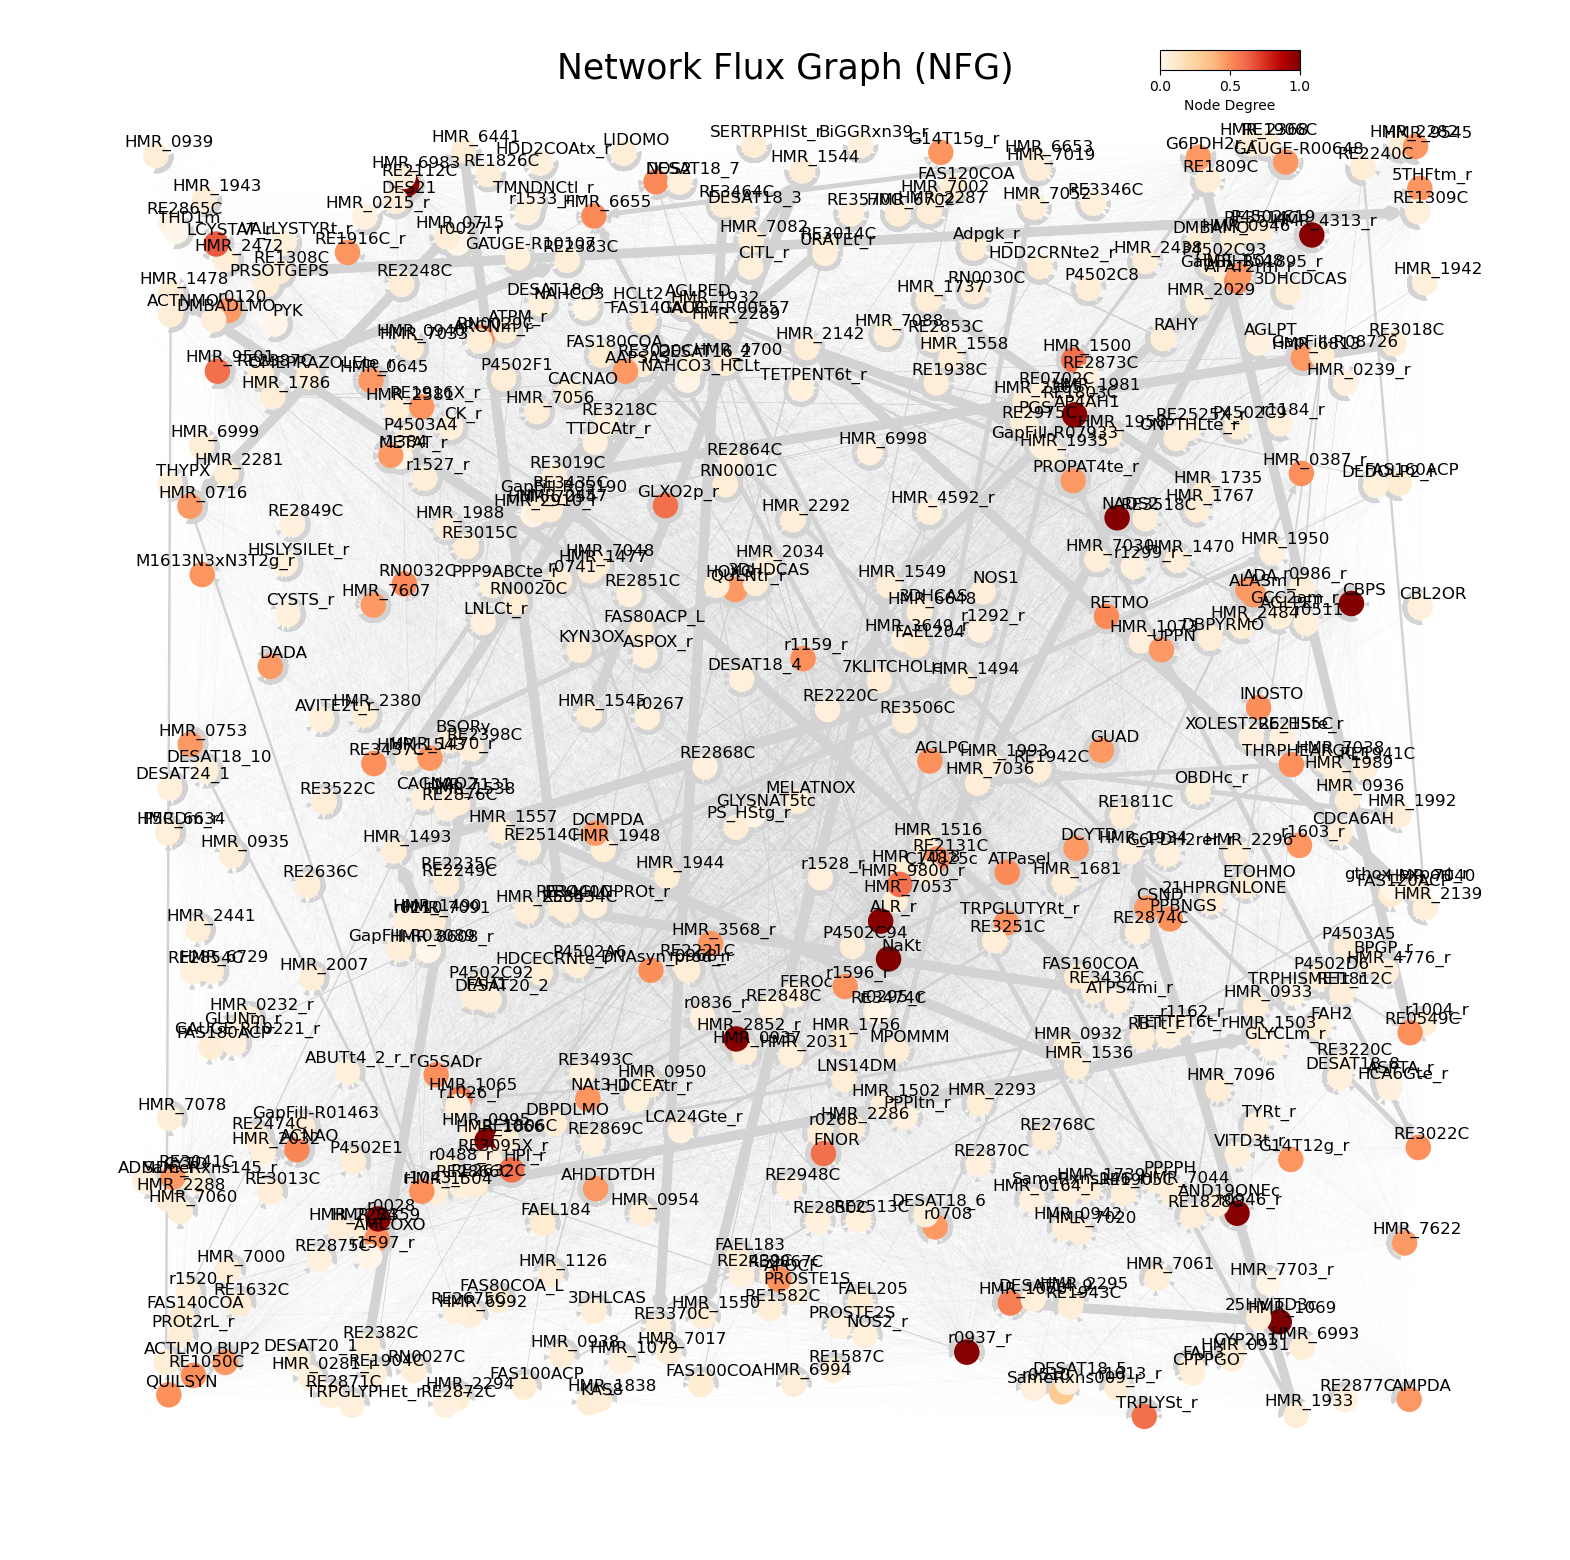

In [ ]:
# Convert D matrix into a graph
G = nx.from_numpy_array(D, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 2500 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)
plt.title('Network Flux Graph (NFG)', fontsize=25, y=0.95)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

# Add a colorbar as the legend for node colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(normalized_degrees_filtered), vmax=max(normalized_degrees_filtered)))
sm.set_array([])
cbar_ax = fig.add_axes([0.7, 0.85, 0.07, 0.01])
cbar = plt.colorbar(sm, cax=cbar_ax, label='Node Degree', orientation='horizontal')

plt.savefig('network_flux_graph.png')
plt.show()

### 3.3 Generation of the "FluxOpenValue" matrix

In [ ]:
# Fix the bounds for boundary reactions
model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000

# Perform pFBA for Biomass on Non-Producing and Producing Cell Lines
model.solver = 'gurobi'
objectives = ['biomass_cho', 'biomass_cho_prod']

fluxes_list = []
for objective in objectives:
    model.objective = objective
    pfba_solution = cobra.flux_analysis.pfba(model)
    fluxes = np.array(pfba_solution.fluxes)
    fluxes_list.append(fluxes)
    
# Stack arrays horizontally
FluxOpenValue = np.column_stack(fluxes_list)

FluxOpenValue

In [ ]:
# Count the number of nonzero values in each row
nonzero_counts = np.count_nonzero(FluxOpenValue, axis=1)

# Count the number of rows that contain only zeros
num_all_zero_rows = np.count_nonzero(nonzero_counts == 0)

# Count the number of rows that contain some nonzero value
num_some_nonzero_rows = np.count_nonzero(nonzero_counts != 0)

print("Number of Rxns with no flux:", num_all_zero_rows)
print("Number of Rxns with any flux:", num_some_nonzero_rows)

### 3.4 Generation of the "Mass Flow Graph (MFG) Matrix"
The MFG provides a versatile framework to create environment-specific metabolic graphs from FBA solutions

In [ ]:
# Calculation of the MFG for each pFBA analysis
PageRank = []
M_list = []
for i in range(FluxOpenValue.shape[1]):
    start = time.time()
    v1 = FluxOpenValue[:, i].T

    # unfolding the flux vector
    # creation of vplus and vminus
    vplus = (np.abs(v1) + v1) / 2
    vminus = (np.abs(v1) - v1) / 2

    # creation of v2m
    v2m = np.concatenate((vplus, vminus))

    # creation of J_v
    J_v = S2mplus @ v2m.reshape(-1)

    # calculation of the MFG
    M = (S2mplus * v2m).T @ pinv(np.diag(J_v)) @ (S2mminus * v2m)
    M_list.append(M)

    # Calculate and store PageRank
    G = nx.from_numpy_array(M, create_using=nx.DiGraph)
    pr = nx.pagerank(G)
    PageRank.append(pr)
    end = time.time()
    print(f"Time taken to go through iteration {i}: {end - start} seconds")
    

# Post-processing of PageRank
df = pd.DataFrame(PageRank)
PageRank = df.values
PageRank = np.array(PageRank).T
PageRankRxns = PageRank[:m, :]
PageRankRxns_back = PageRank[m:, :]

for i in range(m):
    for j in range(PageRankRxns.shape[1]):
        if PageRankRxns_back[i, j] > PageRankRxns[i, j]:
            PageRankRxns[i, j] = PageRankRxns_back[i, j]

### 3.5 Plotting the "MFG Matrix"

In [ ]:
# Convert D matrix into a graph
M_biomass = M_list[0]
M_biomass_producing = M_list[1]
G = nx.from_numpy_array(M_biomass_producing, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 30 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)
plt.title('Mass Flow Graph (MFG)', fontsize=20, y=0.95)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

# Add a colorbar as the legend for node colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(normalized_degrees_filtered), vmax=max(normalized_degrees_filtered)))
sm.set_array([])
cbar_ax = fig.add_axes([0.7, 0.85, 0.07, 0.01])
cbar = plt.colorbar(sm, cax=cbar_ax, label='Node Degree', orientation='horizontal')


plt.savefig('mass_flow_graph.png')
plt.show()

### 3.6 Word Cloud Plot for Metabolites Frecuencies in Pagerank

In [ ]:
#row_sums = PageRankRxns.sum(axis=1)
df = pd.DataFrame()
for i,n in enumerate(objectives):
    sorted_indices = np.argsort(PageRankRxns[:,i])
    rxns_list = []
    values_list = []
    for s in sorted_indices[::-1]:
        rxns_list.append(model.reactions[s].id)
        values_list.append(PageRankRxns[s,i])
    
    df[n] = pd.Series(rxns_list)
    df[f'values_{n}'] = pd.Series(values_list)

In [ ]:
for i,v in df.iterrows():
    print(v['biomass_producing'],v['values_biomass_producing'])

In [ ]:
mets_list = []
for rxn in df['biomass'][df['values_biomass'] > 0.0000412]:
    r = model.reactions.get_by_id(rxn)
    mets = r.metabolites
    for met in mets:
        mets_list.append(met.id)
        
for rxn in df['biomass_producing'][df['values_biomass_producing'] > 0.0000412]:
    r = model.reactions.get_by_id(rxn)
    mets = r.metabolites
    for met in mets:
        mets_list.append(met.id)

In [ ]:
# Count the frequencies of each metabolite
mets_freq = Counter(mets_list)
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h2o_')} #eliminate water
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h2o2_')} #eliminate peroxide
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('co2_')} #eliminate carbon dioxide
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nh4_')} #eliminate amonium
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('h_')} #eliminate protons
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('atp_')} #eliminate atp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('adp_')} #eliminate adp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('amp_')} #eliminate amp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nad_')} #eliminate nad
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadh_')} #eliminate nadh
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadp_')} #eliminate nadp
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('nadph_')} #eliminate nadph
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('na1_')} #eliminate Sodium
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('coa_')} #eliminate CoA
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('accoa_')} #eliminate Acetyl-CoA
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('pi_')} #eliminate phosphate
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('ppi_')} #eliminate phosphate
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('fadh2_')} #eliminate FADH
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('fad_')} #eliminate FAD
mets_freq = {k: v for k, v in mets_freq.items() if not k.startswith('o2_')} #eliminate Oxigen

# Create a circular mask
radius = 500  # you can change to the size you need
circle_img = np.zeros((2*radius, 2*radius), np.uint8)
rr, cc = draw.disk((radius, radius), radius)
circle_img[rr, cc] = 1

# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 500, mask=circle_img, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate_from_frequencies(mets_freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('wordcloud.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()

In [ ]:
counter=0
for met in mets_freq:
    print(met,mets_freq[met])
    counter+=1
    
print(counter)

In [ ]:
#Store the metabolites and their frequencies in a .txt file

with open('metabolites.txt', 'w') as f:
    for i, j in enumerate(mets_freq):
        print(j,'Freq:',mets_freq[j], file=f)

## 4. Identification of duplicates through Chemical Formulas <a id='formulas'></a>

In [ ]:
# Chemical Formula
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO_23052023.xml")

import pandas as pd
data = []

for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        print(r)
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

In [ ]:
for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

In [ ]:
subset_duplicates = df[df.duplicated(subset='Reaction', keep=False)].reset_index(drop=True)
subset_duplicates = subset_duplicates.sort_values(by=['Reaction'])
subset_duplicates.to_excel('Test.xlsx')

for index, n in enumerate(subset_duplicates['Reaction']):
    next_value = subset_duplicates['Reaction'][index + 1]
    if n == next_value:
        print(subset_duplicates['Name'][index])

        

### Duplicates identified

In [ ]:
print(model.metabolites.get_by_id('uppg1_c').name, model.metabolites.get_by_id('HC01609_c').name)
for r in model.metabolites.get_by_id('uppg1_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('HC01609_c').reactions:
    print(r)
# Based on reations HMR_4772 and GapFill-R04972, HC01609_c and uppg1_c  are the same 

In [ ]:
print(model.metabolites.get_by_id('HC02187_c').name, model.metabolites.get_by_id('triodthy_c').name)
for r in model.metabolites.get_by_id('HC02187_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('triodthy_c').reactions:
    print(r)
# Based on reations HMR_6834 and HMR_6826, triodthy_c and HC02187_c  are the same 